In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/apple-leaf-diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (58).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (55).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (22).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (108).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (122).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (140).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (56).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (136).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (143).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (31).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (123).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (28).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (145).JPG
/kaggle/input/apple-leaf-diseases/Apple_cedar_rust/Cedar_rust (129).JP

# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

2024-06-15 11:36:01.353505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 11:36:01.353660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 11:36:01.523458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load dataset

In [3]:
DATASET="/kaggle/input/apple-leaf-diseases"
for file in os.listdir(DATASET): 
    print(file)


Apple_cedar_rust
Apple_black_rot
Apple_scab


# List of Classess

In [4]:
CLASS_list = ['Apple_cedar_rust','Apple_black_rot','Apple_scab']
CLASS_list

['Apple_cedar_rust', 'Apple_black_rot', 'Apple_scab']

# Total number of images

In [5]:
DATASET = "/kaggle/input/apple-leaf-diseases"

print(len(os.listdir(os.path.join(DATASET, 'Apple_cedar_rust'))))
print(len(os.listdir(os.path.join(DATASET, 'Apple_scab'))))
print(len(os.listdir(os.path.join(DATASET, 'Apple_black_rot'))))

160
150
170


# Image distribution using bar graph

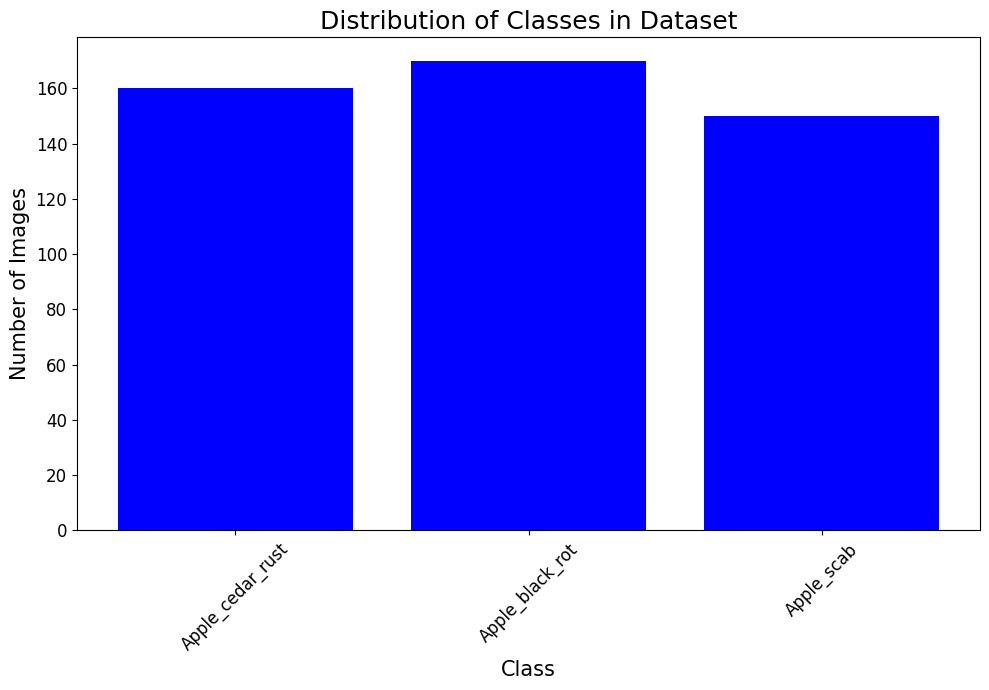

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Example variables (replace with your actual dataset path and class list)
DATASET = "/kaggle/input/apple-leaf-diseases"
CLASS_list = ['Apple_cedar_rust','Apple_black_rot','Apple_scab']
base_ds_dist = np.array([len(os.listdir(os.path.join(DATASET, i))) for i in CLASS_list])
plt.figure(figsize=(10, 7))
plt.bar(CLASS_list, base_ds_dist, color='blue')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of Images', fontsize=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)  # Set y-axis tick label size
plt.title('Distribution of Classes in Dataset', fontsize=18)  # Add a title if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()


# Image display

In [7]:

for folder in os.listdir(DATASET):
    folder_path = os.path.join(DATASET, folder)
    if os.path.isdir(folder_path):  
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)  
            if image is not None:
                height, width, channels = image.shape
                print(f"Image: {filename} - Size: {width}x{height} - Channels: {channels}")
            else:
                print(f"Failed to read image {filename}")

Image: Cedar_rust (58).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (55).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (22).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (108).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (122).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (140).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (56).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (136).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (143).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (31).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (123).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (28).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (145).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (129).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (134).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (99).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (118).JPG - Size: 256x256 - Channels: 3
Image: Cedar_rust (13

#  Verify the dataset directory structure

In [8]:
dataset_path = '/kaggle/input/apple-leaf-diseases'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset directory not found: {dataset_path}")

print("Contents of dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


Contents of dataset directory:
apple-leaf-diseases/
    Apple_cedar_rust/
        Cedar_rust (58).JPG
        Cedar_rust (55).JPG
        Cedar_rust (22).JPG
        Cedar_rust (108).JPG
        Cedar_rust (122).JPG
        Cedar_rust (140).JPG
        Cedar_rust (56).JPG
        Cedar_rust (136).JPG
        Cedar_rust (143).JPG
        Cedar_rust (31).JPG
        Cedar_rust (123).JPG
        Cedar_rust (28).JPG
        Cedar_rust (145).JPG
        Cedar_rust (129).JPG
        Cedar_rust (134).JPG
        Cedar_rust (99).JPG
        Cedar_rust (118).JPG
        Cedar_rust (139).JPG
        Cedar_rust (46).JPG
        Cedar_rust (20).JPG
        Cedar_rust (9).JPG
        Cedar_rust (43).JPG
        Cedar_rust (111).JPG
        Cedar_rust (42).JPG
        Cedar_rust (38).JPG
        Cedar_rust (76).JPG
        Cedar_rust (79).JPG
        Cedar_rust (124).JPG
        Cedar_rust (19).JPG
        Cedar_rust (73).JPG
        Cedar_rust (54).JPG
        Cedar_rust (35).JPG
        Cedar_rust

# Display Images

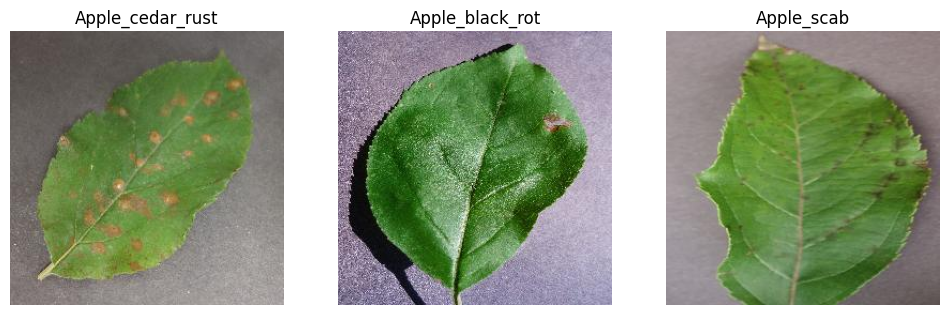

In [9]:
DATASET = "/kaggle/input/apple-leaf-diseases"
# Initialization
plt.figure(figsize=(12, 4))
# List all categories in the dataset directory
categories = os.listdir(DATASET)

for i, category in enumerate(categories):
    category_path = os.path.join(DATASET, category)
    images = os.listdir(category_path)
    random_image_name = random.choice(images)
    image_path = os.path.join(category_path, random_image_name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(categories), i + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()


# Image Data Transformation


In [10]:
IMG_SIZE = 224
DATASET = '/kaggle/input/apple-leaf-diseases/'

# Image resize

In [11]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB (OpenCV uses BGR by default)
    img = cv2.resize(img, (224, 224))  # Resize image to 224x224
    img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    return img

# Example usage:
image_path = '/kaggle/input/apple-leaf-diseases/Apple_black_rot/Black_rot (1).JPG'
preprocessed_img = preprocess_image(image_path)


# Data preprocessing

In [12]:
def load_data(data_path):
    images = []
    labels = []
    categories = os.listdir(data_path)
    label_dict = {category: i for i, category in enumerate(categories)}

    for category in categories:
        class_path = os.path.join(data_path, category)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label_dict[category])
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_dict

images, labels, label_dict = load_data(DATASET)

# Equalizes images

In [13]:

images = images / 255.0

# Data Augmentaion

In [14]:


datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)



# Build the Mobilenet for applie diseases


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


# Define Batch size

In [16]:
batch_size = 32
input_shape = (224, 224, 3)
num_epochs = 1


# Data Generator

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")


Found 384 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Number of classes: 3


# Define the Model:



In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
base_model = MobileNet(input_shape=(224, 224, 3),#we can specify the inpur shape with this parameter
    include_top=False) 
base_model.trainable = False # We freeze the training of the convolutions
base_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

# Train and evluate the model and do Confusion Matrix

Found 384 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Training iteration 1
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 939ms/step - accuracy: 0.7458 - loss: 0.7214 - val_accuracy: 0.9792 - val_loss: 0.0798
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 790ms/step - accuracy: 0.9714 - loss: 0.0698 - val_accuracy: 0.9583 - val_loss: 0.1067
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 848ms/step - accuracy: 0.9967 - loss: 0.0147 - val_accuracy: 0.9896 - val_loss: 0.0333
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9896 - val_loss: 0.0172
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 806ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9792 - val_loss: 0.0358
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 818ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9896 - val_loss: 0.0380
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 793ms/step - accuracy: 1.0000 - loss: 9.6268e-04 - val_accuracy: 0.9792 - val_loss: 0.0262
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 797ms/step - accuracy: 1.0000 - loss: 5.7423e-04 - val_accurac

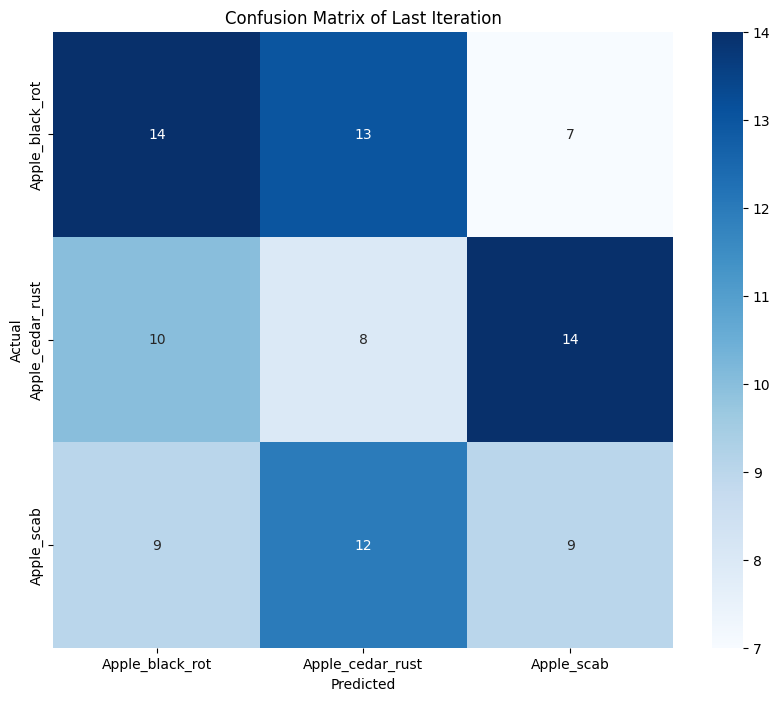

Classification Report of Last Iteration:
                  precision    recall  f1-score   support

 Apple_black_rot       0.42      0.41      0.42        34
Apple_cedar_rust       0.24      0.25      0.25        32
      Apple_scab       0.30      0.30      0.30        30

        accuracy                           0.32        96
       macro avg       0.32      0.32      0.32        96
    weighted avg       0.32      0.32      0.32        96



In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import Model, load_model
import os

# Set parameters
batch_size = 32
input_shape = (224, 224, 3)
num_epochs = 10

# Load data
DATASET = "/kaggle/input/apple-leaf-diseases"
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(DATASET,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(DATASET,
                                                         target_size=(224, 224),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')

# Function to create the model
def create_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model 5 times and store results
results = []
all_confusion_matrices = []

for i in range(5):
    print(f"Training iteration {i+1}")
    model = create_model()
    history = model.fit(train_generator,
                        epochs=num_epochs,
                        validation_data=validation_generator,
                        verbose=1)
    val_acc = history.history['val_accuracy'][-1]
    results.append(val_acc)
    print(f"Iteration {i+1} Validation Accuracy: {val_acc}")

    # Predict the validation data
    y_val_pred = model.predict(validation_generator)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    all_confusion_matrices.append(cm)

# Display results
print("Validation Accuracies for 2 iterations:", results)
print("Mean Validation Accuracy:", np.mean(results))
print("Standard Deviation of Validation Accuracy:", np.std(results))

# Plot confusion matrix of the last iteration
plt.figure(figsize=(10, 8))
sns.heatmap(all_confusion_matrices[-1], annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix of Last Iteration")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Overall classification report for the last iteration
print("Classification Report of Last Iteration:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=list(validation_generator.class_indices.keys())))
